# Tercera Tarea

In [8]:
if(!require(dplyr, quietly = TRUE, warn.conflicts = FALSE) ){
    install.packages('dplyr',
        dependencies = TRUE, 
        repos = "http://cran.us.r-project.org")
}

In [205]:
library(dplyr)
library(ggplot2)
library(ggthemes)
library(gridExtra)
library(tidyr)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()



## Parte 1
De la base de datos de proyecciones poblacionales de CONAPO, hacer al menos 5 visualizaciones para entender el crecimiento poblacional. Se tienen muchas variables y categorías por explorar, se espera un análisis y contexto de las gráficas así como una interpretación.

In [24]:
CONAPO <- read.csv(file = 'Data/pob_mit_proyecciones.csv', header = TRUE, sep =",", fileEncoding = 'iso-8859-1')

### Hagamos una interpretación de la base de datos proporcionada

Como podemos ver, la base de datos nos proporciona (por estado y República Mexicana), la población que ha tenido el país por sexo y por edad desde 1950 hasta lo que está proyectado al 2050. 

Además, notemos que se nos proporciona la información de la población dependiendo del sexo (M o F) y de las edades 0-109 años. 

Por último, notemos que tenemos 33 entidades distintas, 31 estados, la Ciudad de México y la República Mexicana

In [28]:
head(CONAPO) #Checamos el primer año

,RENGLON,AÑO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION
,<int>,<int>,<fct>,<int>,<int>,<fct>,<int>
1,1,1950,República Mexicana,0,0,Hombres,572103
2,2,1950,República Mexicana,0,0,Mujeres,559162
3,3,1950,República Mexicana,0,1,Hombres,514540
4,4,1950,República Mexicana,0,1,Mujeres,505269
5,5,1950,República Mexicana,0,2,Hombres,478546
6,6,1950,República Mexicana,0,2,Mujeres,469322


In [50]:
tail(CONAPO) # Checamos el último año

,RENGLON,AÑO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION
,<int>,<int>,<fct>,<int>,<int>,<fct>,<int>
592455,592455,2050,Zacatecas,32,107,Hombres,2
592456,592456,2050,Zacatecas,32,107,Mujeres,4
592457,592457,2050,Zacatecas,32,108,Hombres,1
592458,592458,2050,Zacatecas,32,108,Mujeres,2
592459,592459,2050,Zacatecas,32,109,Hombres,0
592460,592460,2050,Zacatecas,32,109,Mujeres,1


In [257]:
CONAPO %>% select(EDAD, SEXO) %>% group_by(EDAD) # Checamos el sexo y las edades

EDAD,SEXO
<int>,<fct>
0,Hombres
0,Mujeres
1,Hombres
1,Mujeres
2,Hombres
2,Mujeres
3,Hombres
3,Mujeres
4,Hombres


In [49]:
CONAPO %>% 
select(ENTIDAD) %>% 
group_by(ENTIDAD) %>% 
summarise(count = n()) #Checamos las entidades

`summarise()` ungrouping output (override with `.groups` argument)



ENTIDAD,count
<fct>,<int>
Aguascalientes,17820
Baja California,17820
Baja California Sur,17820
Campeche,17820
Chiapas,17820
Chihuahua,17820
Ciudad de México,17820
Coahuila,17820
Colima,17820


### 1.1 Población total de la República Mexicana

In [279]:
pob_total <- CONAPO %>% 
            filter(ENTIDAD == "República Mexicana") %>% 
            group_by(AÑO) %>% summarise(TOTAL_POBLACION = sum(POBLACION))

`summarise()` ungrouping output (override with `.groups` argument)



In [70]:
head(pob_total)

AÑO,TOTAL
<int>,<int>
1950,27026573
1951,27780135
1952,28578641
1953,29418995
1954,30311877
1955,31272636


In [71]:
tail(pob_total)

AÑO,TOTAL
<int>,<int>
2045,147032055
2046,147339891
2047,147611293
2048,147846533
2049,148045885
2050,148209594


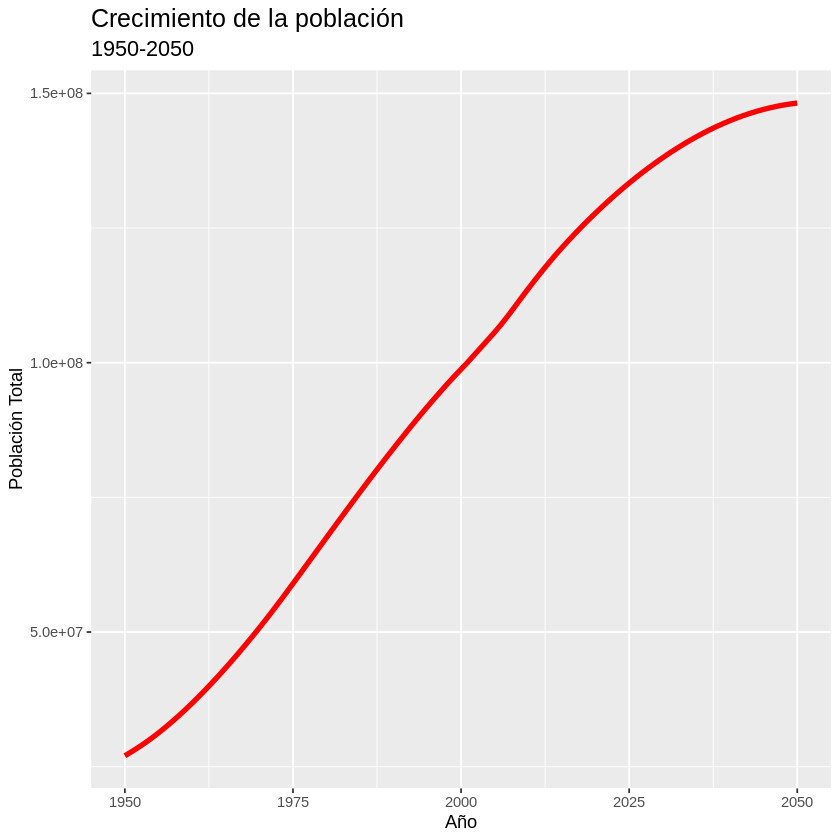

In [296]:
ggplot(pob_total, aes(AÑO, TOTAL_POBLACION)) + geom_line(color = 'red', size = 1.5) + 
labs(title = 'Crecimiento de la población', subtitle = '1950-2050', x = 'Año', y = 'Población Total') + 
theme(plot.title = element_text(size = 15), plot.subtitle = element_text(size = 13))

##### ¿Qué hicimos?
En la gráfica se presenta el crecimiento poblacional de la República Mexicana desde el año 1950 y la proyección que se tiene para los años que siguen, hasta el 2050

##### ¿Cómo lo hicimos?
Filtramos la base de datos original para obtener solamente la información de la República Mexicana e hicimos una nueva solamente con estos datos. En ella agrupamos por año e hicimos una columna nueva en la que se sume los datos de población por año ya que la original separa los datos entre hombres y mujeres. 

##### ¿Qué nos dice la gráfica y los datos obtenidos?
Podemos ver en la gráfica que el periodo de 25 años en el que se ve un incremento importante en la población es de 1975 - 2000. Además podemos ver que se prevé una disminución en el crecimiento poblacional a partir del 2025. Con los datos obtenidos podemos ver que para 2050 se cree que la República Mexicana tendrá casi 150 millones de habitantes. 

### 1.2 Crecimiento por estado en el milenio. (2000-2020)

In [297]:
pob_estatal <- filter(CONAPO, ENTIDAD != "República Mexicana", 2000 < AÑO, AÑO < 2021) %>%
                  group_by(AÑO, ENTIDAD) %>%
                  summarise(TOTAL_POBLACION = sum(POBLACION))

`summarise()` regrouping output by 'AÑO' (override with `.groups` argument)



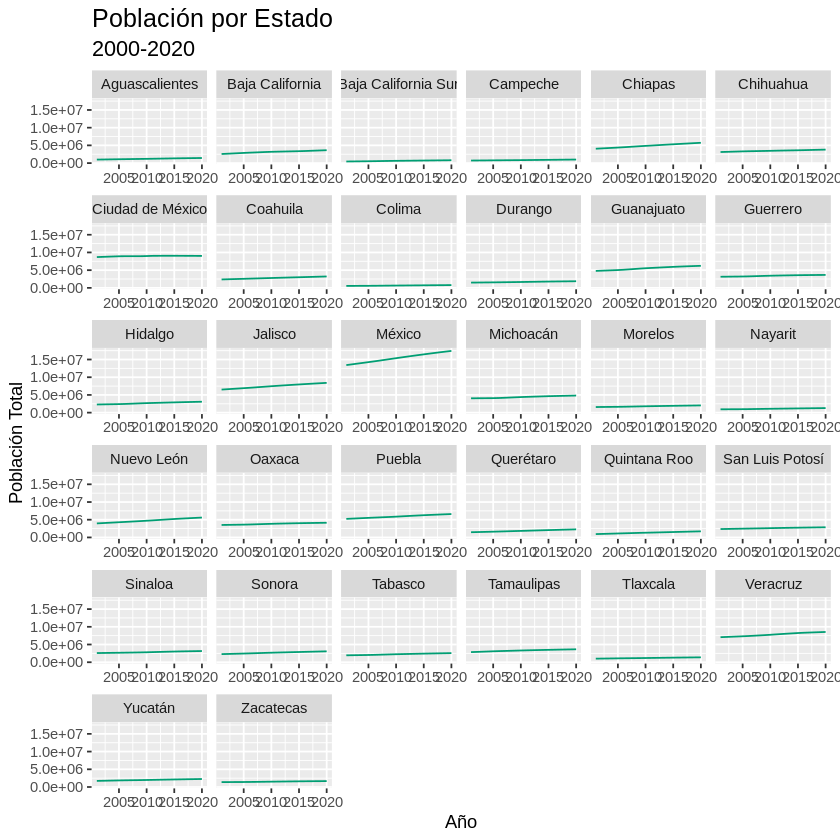

In [302]:
ggplot(pob_estatal, aes(AÑO, TOTAL_POBLACION), height = 100) + geom_line(color = '#009E73') + 
facet_wrap(~ENTIDAD, scales = 'free_x') +
labs(title = "Población por Estado", subtitle = '2000-2020', x = "Año", y = "Población Total") +
theme(plot.title = element_text(size = 15), plot.subtitle = element_text(size = 13))

##### ¿Qué hicimos?
En la gráfica se presenta el crecimiento poblacional de los estados de la República Mexicana desde el año 2000 al 2020

##### ¿Cómo lo hicimos?
Filtramos la base de datos original para obtener solamente la información de los estados y también filtramos para solamente obtener los datos desde 2000-2020 e hicimos una nueva solamente con estos datos. En ella agrupamos por año e hicimos una columna nueva en la que se sume los datos de población por año de cada estado. 

##### ¿Qué nos dice la gráfica y los datos obtenidos?
Podemos ver en las gráficas de cada estado que la mayoría se ha mantenido constante, pero en unos estados como el Estado de México, Chiapas, Veracruz y Puebla ha habido un incremento notorio en la poblacion. También, con estas gráficas podemos notar los estados que tienen menos población como Baja California Sur, Coliuma y Tlaxcala. 

### 1.3 Diferencia de crecimiento de población en la República Mexicana entre hombre y mujer. 
#### (Proyección 2021 - 2050)

In [315]:
pob_hym <- CONAPO %>% select(ENTIDAD, AÑO, SEXO, POBLACION) %>% 
            filter(ENTIDAD == "República Mexicana", 2020 < AÑO) %>% 
            group_by(AÑO, SEXO) %>% summarise(TOTAL_POBLACION = sum(POBLACION))

`summarise()` regrouping output by 'AÑO' (override with `.groups` argument)



In [316]:
head(pob_hym)

AÑO,SEXO,TOTAL_POBLACION
<int>,<fct>,<int>
2021,Hombres,63139259
2021,Mujeres,65833180
2022,Hombres,63692767
2022,Mujeres,66425589
2023,Hombres,64228297
2023,Mujeres,67001958


In [312]:
tail(pob_hym)

AÑO,SEXO,TOTAL_POBLACION
<int>,<fct>,<int>
2048,Hombres,72044854
2048,Mujeres,75801679
2049,Hombres,72133125
2049,Mujeres,75912760
2050,Hombres,72204750
2050,Mujeres,76004844


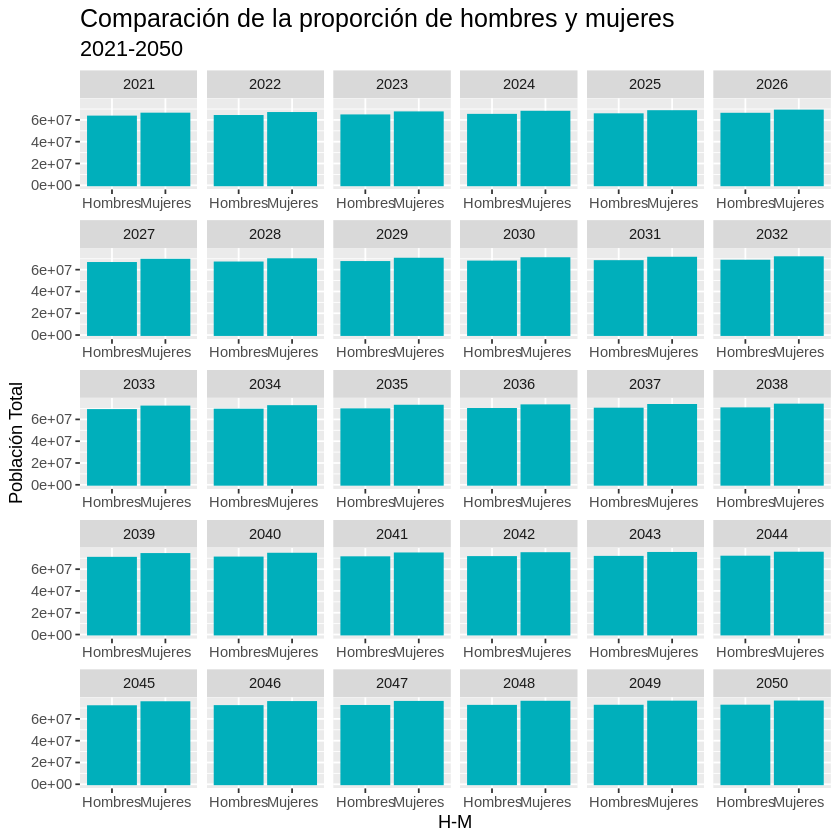

In [310]:
ggplot(pob_hym, aes(SEXO, TOTAL_POBLACION)) + 
geom_bar(stat = "identity", fill = "#00AFBB", color = "#00AFBB", ) + 
facet_wrap(~AÑO, scales = 'free_x') + 
labs(title = "Comparación de la proporción de hombres y mujeres", subtitle = '2021-2050', x = "H-M", y = "Población Total") +
theme(plot.title = element_text(size = 15), plot.subtitle = element_text(size = 13))

##### ¿Qué hicimos?
En la gráfica se presenta la proyección del crecimiento poblacional de las mujeres y los hombres de la República Mexicana entre los años 2021-2050

##### ¿Cómo lo hicimos?
Filtramos la base de datos original para obtener solamente la información de la República Mexicana y también seleccionamos los años 2021-2050 e hicimos una nueva solamente con estos datos. En ella agrupamos por año y sexo e  hicimos una columna nueva en la que se sume los datos del crecimiento poblacional. 

##### ¿Qué nos dice la gráfica y los datos obtenidos?
Podemos ver en las gráficas desde 2021 hay más mujeres en la República que hombres, como es usualmente en todo el mundo. Pero, podemos notar que esta brecha en la diferencia irá aumentando cada año. Con los datos podemos ver que esta diferencia comienza con aproximadamente 2,000,000 y que para el 2050 se proyecta una diferencia de aproximadamente 4,000,000, lo cual es bastante. 

### 1.4 Pirámide de población 
#### Comparación entre 1950 y 2020

In [319]:
pob_2020 <- CONAPO %>% select(ENTIDAD, AÑO, SEXO, EDAD, POBLACION) %>% 
            filter(ENTIDAD == "República Mexicana", AÑO == 2020) %>% 
            group_by(EDAD, SEXO) %>% summarise(TOTAL_POBLACION = sum(POBLACION))
pob_1950 <- CONAPO %>% select(ENTIDAD, AÑO, SEXO, EDAD, POBLACION) %>% 
            filter(ENTIDAD == "República Mexicana", AÑO == 1950) %>% 
            group_by(EDAD, SEXO) %>% summarise(TOTAL_POBLACION = sum(POBLACION))

`summarise()` regrouping output by 'EDAD' (override with `.groups` argument)

`summarise()` regrouping output by 'EDAD' (override with `.groups` argument)



In [354]:
p_2020 <- ggplot(pob_2020, aes(x = EDAD, y = TOTAL_POBLACION, fill = SEXO)) +
geom_col(data = subset(pob_2020, SEXO == "Hombres") %>% mutate(TOTAL_POBLACION = -TOTAL_POBLACION), width = 0.5, fill = "#56B4E9") + 
geom_col(data = subset(pob_2020, SEXO == "Mujeres"), width = 0.5, fill = "#CC79A7") + 
coord_flip() + 
scale_y_continuous(
    breaks = c(seq(-2000000, -200000, by = 200000), seq(0, 2000000, by = 200000)),
    labels = c(seq(-2000000, -200000, by = 200000) * -1, seq(0, 2000000, by = 200000))) +
labs(title = "Pirámide poblacional", subtitle = '2020', x = "Edades", y = "Año") +
theme(plot.title = element_text(size = 15), plot.subtitle = element_text(size = 13))

In [355]:
p_1950 <- ggplot(pob_1950, aes(x = EDAD, y = TOTAL_POBLACION, fill = SEXO)) +
geom_col(data = subset(pob_1950, SEXO == "Hombres") %>% mutate(TOTAL_POBLACION = -TOTAL_POBLACION), width = 0.5, fill = "#56B4E9"
        ) + 
geom_col(data = subset(pob_1950, SEXO == "Mujeres"), width = 0.5, fill = "#CC79A7") + 
coord_flip() + 
scale_y_continuous(
    breaks = c(seq(-2000000, -200000, by = 200000), seq(0, 2000000, by = 200000)),
    labels = c(seq(-2000000, -200000, by = 200000) * -1, seq(0, 2000000, by = 200000))) +
labs(title = "Pirámide poblacional", subtitle = '1950', x = "Edades", y = "Año") +
theme(plot.title = element_text(size = 15), plot.subtitle = element_text(size = 13))

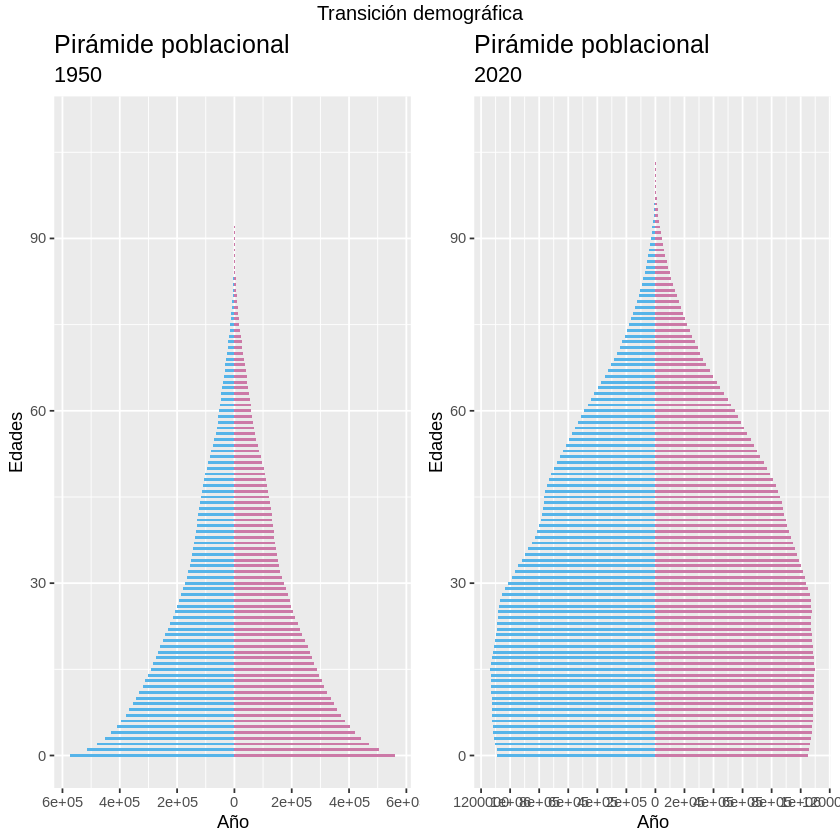

In [356]:
grid.arrange(p_1950, p_2020, ncol = 2, top = 'Transición demográfica')

##### ¿Qué hicimos?
Hicimos las pirámides poblacionales de la República Mexicana de los años 1950 y 2020 para poder hacer un una comparación entre estas y lo que significan

##### ¿Cómo lo hicimos?
Filtramos la base de datos original para obtener solamente la información de la República Mexicana del año 1950 e hicimos una nueva base de datos, se hizo lo mismo para el año 2020. En ella agrupamos por edad y sexo e  hicimos una columna nueva en la que se sume los datos del crecimiento poblacional separados entre los sexos.

##### ¿Qué nos dice la gráfica y los datos obtenidos?
Podemos notar un cambio significante en las formas de las pirámides. La de 1950 nos dice que hay una gran cantidad de población joven , que decrece con rapidez en las edades altas, es decir, hay una tasa de natalidad muy alta. 
La de 2020 nos dice que la población se concentra en los jóvene, pero que hay una reducción creciente en la tasa de natalidad.
Al comparar las dos pirámides podemos ver que hay, en efecto, un crecimiento de población, una población adulta y anciana. Podemos ver que el pico de la pirámide de 1950 está mucho más abajo que la del 2020, es decir, hay más esperanza de vida. 

##### Nota
Para este ejercicio se consultó https://juvenalcampos.com/2020/01/26/visualizando-pir%C3%A1mides-de-poblaci%C3%B3n-en-r/

### 1.5 Nacimientos por año entre mujeres y hombres.
#### Proyección (1950-2050)

In [417]:
pob_cero <- filter(CONAPO, ENTIDAD == "República Mexicana", EDAD == 0) %>%
                  group_by(AÑO) %>%
                  summarise(NIÑA_POBLACION = sum(POBLACION[SEXO == 'Mujeres']), NIÑO_POBLACION = sum(POBLACION[SEXO == 'Hombres']))

`summarise()` ungrouping output (override with `.groups` argument)



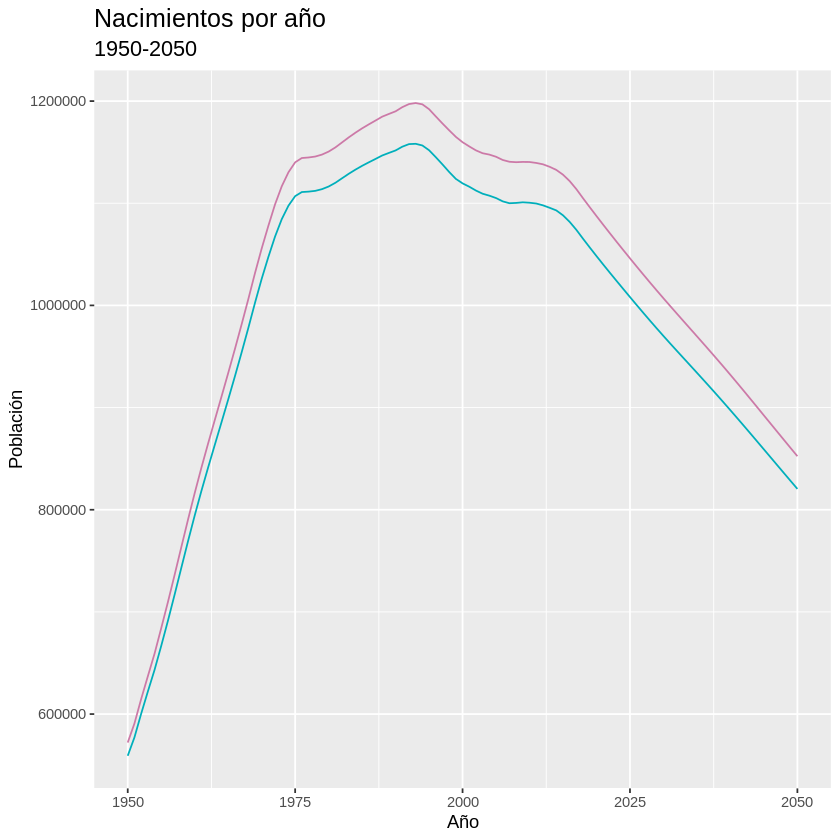

In [418]:
ggplot(pob_cero, aes(AÑO)) +
geom_line(aes(AÑO, NIÑA_POBLACION), color = "#00AFBB") +
geom_line(aes(AÑO, NIÑO_POBLACION), color = "#CC79A7") +
labs(title = "Nacimientos por año", subtitle = '1950-2050', x = "Año", y = "Población", color = 'Sexo') +
theme(plot.title = element_text(size = 15), plot.subtitle = element_text(size = 13))

##### ¿Qué hicimos?
Hicimos dentro de la misma gráfica las gráficas de los nacimientos por año de hombres y mujeres dentro de la República.

##### ¿Cómo lo hicimos?
Filtramos la base de datos original para obtener solamente la información de la República Mexicana de la edad de 0 años, es decir, los recién nacidos ese año. Hicimos una nueva base de datos, en la que solamente se muestra por año el total de la población de hombres y de mujeres. 

##### ¿Qué nos dice la gráfica y los datos obtenidos?
Podemos notar que durante la década de los 50's, los nacimientos eran bastante parejos, es decir, casi nacía la misma cantidad de hombres y mujeres. Podemos ver también que hubo una tasa de natalidad muy alta entre 1950 y 1975 y que empezó a haber una brecha significante entre los nacimientos de hombres y mujeres. Notamos que hay un punto de inflexión en las curvas alrededor del año 1993, de ahí tenemos que la tasa de natalidad se ha ido reduciendo. Estos datos concuerdan con el análisis que se hizo de las pirámides poblacionales. 


## Parte 2
Con la misma base de datos, se requiere hacer todas las visualizaciones interactivas; las mismas 5 o más visualizaciones, ahora interactivas (recuerden plot.ly). 
**Sugerencia:** el año tiene que ser una de estas categorías ya que son proyecciones.